## Atividade de nivelamento - Mineração de Dados

Aluno: Felipe Ferreira Vasconcelos


NUsp: 16298020

In [1]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install imblearn
!pip install seaborn
!pip install plotly

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

## Seleção da base de dados

A base de dados escolhida foi uma base de dados sintética envolvendo informações de alunos (Notas de GPA e GMAT, raça, gênero e etc) e um campo informando o status da admissão deles em universidades norte-americanas.

O dataset está disponível no Kaggle: https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

O dataset consta com 6194 registros e 9 colunas, sendo elas:

* application_id: Identificador único
* gender: Gênero (Male/Female)
* international: Caso seja estudante internacional (TRUE/FALSE)
* gpa: Nota do GPA
* major: Area Major de graduação (e.g., STEM, Humanities)
* race: Raça
* gmat: Nota do GMAT
* work_exp: Anos de experiência de trabalho
* work_industry: Indústria em que o estudante trabalhou (Finance, Tech)
* admission: Status da admissão (e.g., Admit, Waitlist, Null: Deny)


### Objetivo de classificação

O objetivo de classificação deste dataset é descobrir o status de admissão de um aluno em uma universidade norte-americana. Os resultados podem ser: "Admited", "Denied" e "Waitlist".

In [3]:
df = pd.read_csv('mba.csv',index_col='application_id')
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
application_id,,,,,,,,,
1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...
6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit


In [4]:
df.columns

Index(['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp',
       'work_industry', 'admission'],
      dtype='object')

In [5]:
df.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


## Pré-processamento/Tratamento

O dataset não está tratado, logo se faz necessário realizar algumas operações de pré-processamento, como:

* Transformação de campos textuais em númericos
* Remoção de campos nulos
* Balanceamento do dataset


In [6]:
# Tratamento de dados da coluna admission para númericos

df['admission'] = df['admission'].replace({"Admit":"1"})
df['admission'] = df['admission'].replace({"Denied":"2"})
df['admission'] = df['admission'].replace({None:"2"})
df['admission'] = df['admission'].replace({"Waitlist":"3"})
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
application_id,,,,,,,,,
1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,1
2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,2
3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,1
4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,2
5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,2
...,...,...,...,...,...,...,...,...,...
6190,Male,False,3.49,Business,White,640.0,5.0,Other,2
6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,2
6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,1


In [7]:
# Removendo campos que tenham valores nulos

df = df.dropna(ignore_index=True)
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,1
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,2
2,Male,False,3.47,STEM,Black,690.0,6.0,Technology,2
3,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,2
4,Male,False,3.18,Business,White,610.0,6.0,Consulting,2
...,...,...,...,...,...,...,...,...,...
4347,Male,False,3.03,Humanities,Asian,570.0,6.0,PE/VC,2
4348,Male,False,3.12,STEM,Black,630.0,4.0,Consulting,2
4349,Male,False,3.49,Business,White,640.0,5.0,Other,2
4350,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,2


<Axes: >

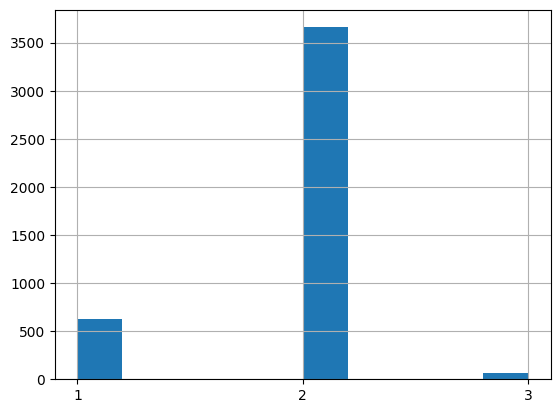

In [8]:
df.admission.hist()

### Desbalanceamento

É possível observar um grande desbalanceamento entre as classes, de modo que a classe "Denied" tem mais do que 5 vezes o valor da classe "Admit". 

Para melhorar o desempenho do algoritmo, iremos realizar um balanceamento, criando sinteticamente novos valores para as classes.

In [9]:
# Balancemaento dos dados

from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
df_x = df.drop(['admission'],axis='columns')
df_sampled, y_sampled = sampler.fit_resample(df_x,df['admission']) 
df_sampled


,gender,international,gpa,major,race,gmat,work_exp,work_industry
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management
2,Male,False,3.47,STEM,Black,690.0,6.0,Technology
3,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting
4,Male,False,3.18,Business,White,610.0,6.0,Consulting
...,...,...,...,...,...,...,...,...
10975,Female,False,3.12,Humanities,Asian,600.0,3.0,Technology
10976,Male,False,3.26,Business,White,670.0,6.0,Consulting
10977,Female,False,3.41,STEM,White,670.0,4.0,PE/VC
10978,Male,False,3.29,STEM,Hispanic,750.0,6.0,PE/VC


In [10]:
y_sampled

0        1
1        2
2        2
3        2
4        2
        ..
10975    3
10976    3
10977    3
10978    3
10979    3
Name: admission, Length: 10980, dtype: object

<Axes: >

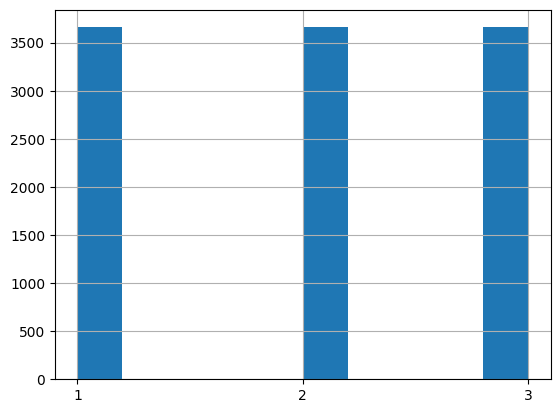

In [11]:
y_sampled.hist()

In [12]:
df = df_sampled
df['admission'] = y_sampled
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,1
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,2
2,Male,False,3.47,STEM,Black,690.0,6.0,Technology,2
3,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,2
4,Male,False,3.18,Business,White,610.0,6.0,Consulting,2
...,...,...,...,...,...,...,...,...,...
10975,Female,False,3.12,Humanities,Asian,600.0,3.0,Technology,3
10976,Male,False,3.26,Business,White,670.0,6.0,Consulting,3
10977,Female,False,3.41,STEM,White,670.0,4.0,PE/VC,3
10978,Male,False,3.29,STEM,Hispanic,750.0,6.0,PE/VC,3


## DummyClassifier

A partir do dataset tratado e balanceado, nós podemos utilizar o DummyClassifier para obter um valor de acurácia inicial. Esse valor será usado como valor de base de comparação com o KNN.

Iremos realizar a classificação com o Dummy no dataset sem padronização e sem enconding.

In [13]:
# DummyClassifier com os dados sem nenhuma interferência

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=4)

y_train = df_train['admission']
X_train = df_train.drop(['admission'],axis='columns')

y_test = df_test['admission']
X_test = df_test.drop(['admission'],axis='columns')
X_test

,gender,international,gpa,major,race,gmat,work_exp,work_industry
5500,Male,False,3.33,Humanities,Asian,720.0,5.0,Other
9413,Female,False,3.36,Humanities,White,640.0,5.0,PE/VC
126,Female,False,3.23,Business,Black,680.0,6.0,Health Care
10382,Male,False,3.41,Business,Black,670.0,4.0,Technology
387,Male,False,3.32,Business,Asian,610.0,5.0,Nonprofit/Gov
...,...,...,...,...,...,...,...,...
6663,Female,False,3.38,Humanities,Asian,700.0,4.0,Financial Services
1097,Male,False,3.45,STEM,White,680.0,6.0,Investment Banking
6291,Male,False,3.41,Humanities,Asian,670.0,6.0,Financial Services
9775,Female,False,3.24,Business,Other,650.0,4.0,Consulting


In [14]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
print(classification_report(y_test, dummy.predict(X_test)))

              precision    recall  f1-score   support

           1       0.37      0.38      0.37       728
           2       0.35      0.34      0.34       739
           3       0.34      0.34      0.34       729

    accuracy                           0.35      2196
   macro avg       0.35      0.35      0.35      2196
weighted avg       0.35      0.35      0.35      2196



### Encoding e Padronização

Como parte do pré-processamento, com o objetivo de obter melhores resultados do que o Dummy, iremos realizar o encoding utilizando *OneHotEncoder* e a padronização com o *StandardScaler*.

In [15]:
# Encoding dos itens categóricos, com o objetivo de transformá-los de texto em números. 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
dados = encoder.fit_transform(df[["gender","international","major","race","work_industry"]])

df_encoded = pd.DataFrame(dados.toarray(),columns=encoder.get_feature_names_out())
df_final = pd.concat([df_encoded, df[['gpa','gmat','work_exp','admission']].reset_index(drop=True)], axis=1)

df_final


,gender_Female,gender_Male,international_False,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,...,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,gpa,gmat,work_exp,admission
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.30,620.0,3.0,1
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.28,680.0,5.0,2
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.47,690.0,6.0,2
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.35,590.0,5.0,2
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.18,610.0,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.12,600.0,3.0,3
10976,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.26,670.0,6.0,3
10977,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.41,670.0,4.0,3
10978,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.29,750.0,6.0,3


In [16]:
df_target = df_final['admission']
df_final = df_final.drop(['admission'],axis='columns')
df_target

0        1
1        2
2        2
3        2
4        2
        ..
10975    3
10976    3
10977    3
10978    3
10979    3
Name: admission, Length: 10980, dtype: object

In [17]:
# Padronização das features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_norm = scaler.fit_transform(df_final[['gpa','gmat','work_exp']])

df_final[['gpa','gmat','work_exp']] = df_norm



In [18]:
df_final['admission'] = df_target
df_final

,gender_Female,gender_Male,international_False,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,...,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,gpa,gmat,work_exp,admission
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.006500,-1.091589,-1.964992,1
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.148380,0.173854,0.011430,2
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.199484,0.384762,0.999641,2
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.348201,-1.724311,0.011430,2
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.857782,-1.302496,0.999641,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.283423,-1.513404,-1.964992,3
10976,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.290260,-0.037053,0.999641,3
10977,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.773842,-0.037053,-0.976781,3
10978,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.077440,1.650205,0.999641,3


## KNN

Iremos executar o KNN algumas vezes. A primeira delas será realizada com todos os campos, ou seja, sem seleção de features. 

Após isso, o desempenho será avaliado e técnicas como *SelectKBest* serão aplicadas para observar se a seleção de features aumenta a acurácia. 

O objetivo desse classificador é identificar se um aluno seria ou não admitido em uma universidade. Ou seja, o target é o campo "admission".

In [19]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=4)

y_train = df_train['admission']
X_train = df_train.drop(['admission'],axis='columns')
X_train

,gender_Female,gender_Male,international_False,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,...,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,gpa,gmat,work_exp
254,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.857782,-1.724311,0.999641
6839,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.277261,-0.037053,0.011430
930,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.695389,-2.146126,0.011430
3822,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.141543,-0.247960,-0.976781
5875,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.915723,-0.247960,0.999641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.077440,1.861113,0.011430
709,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.219320,-0.458867,-1.964992
10679,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.341364,-0.037053,-0.976781
8366,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.638124,-1.091589,0.999641


In [20]:
y_test = df_test['admission']
X_test = df_test.drop(['admission'],axis='columns')
X_test

,gender_Female,gender_Male,international_False,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,...,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,gpa,gmat,work_exp
5500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.206321,1.017484,0.011430
9413,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.419141,-0.669775,0.011430
126,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.503081,0.173854,0.999641
10382,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.773842,-0.037053,-0.976781
387,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.135381,-1.302496,0.011430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561022,0.595669,-0.976781
1097,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.057603,0.173854,0.999641
6291,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773842,-0.037053,0.999641
9775,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.432141,-0.458867,-0.976781


### Dummy Classifier

Novamente, para fins de comparação, primeiramente iremos testar com um Dummy Classifier nesses dados padronizados.

In [21]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
print(classification_report(y_test, dummy.predict(X_test)))

              precision    recall  f1-score   support

           1       0.32      0.31      0.32       728
           2       0.33      0.33      0.33       739
           3       0.33      0.34      0.33       729

    accuracy                           0.33      2196
   macro avg       0.33      0.33      0.33      2196
weighted avg       0.33      0.33      0.33      2196



In [22]:
from sklearn.model_selection import cross_val_score

dummyscores = cross_val_score(dummy, X_train, y_train, cv=5) 
print("Folds", dummyscores)
print("Acc:", np.mean(dummyscores))

Folds [0.32327832 0.33352305 0.34262948 0.35230507 0.31947608]
Acc: 0.3342423990986914


### KNN - Sem seleção de features

In [23]:
# Execução do KNN com K=2 (Seguindo a ideia de k-1 como número de K)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90       728
           2       1.00      0.76      0.86       739
           3       0.98      1.00      0.99       729

    accuracy                           0.92      2196
   macro avg       0.93      0.92      0.92      2196
weighted avg       0.93      0.92      0.92      2196



In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=5) 
print("Acc:", np.mean(scores))

Acc: 0.9051680035471522


### Seleção de Features e GridSearch

Agora, iremos buscar a melhor combinação de features e paramêtros por meio do SelectKBest e do GridSearch.

In [26]:
Busca dos melhores paramêtros e melhor quantidade de features

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

for x in range(2,len(df_train.columns)+1):

    X_selected = SelectKBest(k=x).fit_transform(X_train,y_train)
    X_test_selected = SelectKBest(k=x).fit_transform(X_test,y_test)

    knn_clean = KNeighborsClassifier()

    grid_search = GridSearchCV(
        estimator=knn_clean,
        param_grid={
            "n_neighbors":[n for n in range(2,8)],
            'metric':['cosine','euclidean','minkowski'],
            'weights':['uniform','distance']
        },
        scoring="accuracy",
        cv=3,
        error_score="raise"
    )

    grid_search.fit(X_selected,y_train)

    print(x)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    print()


SyntaxError: invalid syntax (3176428765.py, line 1)

### Seleção de Features

Temos que o resultado é o seguinte:

~~~yaml
15
0.9337431693989071
KNeighborsClassifier(metric='cosine', n_neighbors=2, weights='distance')
~~~

Ou seja com 15 features, utilizando-se da métrica 'cosine', com o paramêtro K=2 e com pesos ponderados, obtemos a melhor acurácia. 

Iremos executar a validação cruzada no KNN com esses paramêtros:

In [179]:
# Execução do KNN
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=2,metric='cosine',weights='distance')

num_features = 15
selector = SelectKBest(k=num_features)
X_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)


knn.fit(X_selected, y_train)

y_pred = knn.predict(X_test_selected)

print(classification_report(y_test, y_pred))

scores = cross_val_score(knn, X_selected, y_train, cv=3)
print("Acc:", np.mean(scores))

/home/felipe/code/usp/mineracao_dados/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/felipe/code/usp/mineracao_dados/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              precision    recall  f1-score   support

           1       0.90      0.99      0.94       728
           2       0.99      0.87      0.93       739
           3       0.98      1.00      0.99       729

    accuracy                           0.95      2196
   macro avg       0.96      0.95      0.95      2196
weighted avg       0.96      0.95      0.95      2196

Acc: 0.9324908925318761


In [180]:
selector.get_feature_names_out()

array(['gender_Female', 'gender_Male', 'major_Business', 'major_STEM',
       'race_Black', 'race_White', 'work_industry_Consulting',
       'work_industry_Health Care', 'work_industry_Investment Management',
       'work_industry_Nonprofit/Gov', 'work_industry_Real Estate',
       'work_industry_Technology', 'gpa', 'gmat', 'work_exp'],
      dtype=object)

## Análise do KNN

Como dito anteriormente, o objetivo era identificar se um aluno seria aprovado, negado ou colocado em lista de espera para as universidades norte-americanas. O primeiro passo foi realizar o pré-processamento.

Após todo o processo de pré-processamento, tratamento, normalização e balanceamento dos dados, o dataset foi transformado para 28 features. A partir dessas 28 features, foi utilizado o *SelectKBest* para obter as melhores features, o que resultou em 15 features.

### Seleção de Features 

A partir da seleção de features, é possivel identificar que fatores que mais contribuem para a aprovação de um aluno, como a indústria onde o estudante tinha experiência. Enquanto isso, fatores como se a nacionalidade do estudante não contribuiam para os resultados.

Outro ponto interessante para ser analisado na seleção de features, é a preferência dada para os majors de Business (Negócios) e STEM (área de exatas), de modo que majors como Humanities (humanas) foram desconsiderados.

Vale ressaltar que, diferente das universidades brasileiras, que se baseiam apenas em pontuações de provas como ENEM e Fuvest, as universidades norte-americanas tem processos seletivos baseados em currículo. 

As features selecionadas foram:


~~~yaml
['gender_Female', 'gender_Male', 'major_Business', 'major_STEM',
'race_Black', 'race_Hispanic', 'race_White',
'work_industry_Consulting', 'work_industry_Health Care',
'work_industry_Nonprofit/Gov', 'work_industry_Real Estate',
'work_industry_Technology', 'gpa', 'gmat', 'work_exp']
~~~

### Seleção de paramêtros

Para a seleção dos melhores paramêtros para o KNN, utilizou-se do *GridSearchCV*. Foram testados os seguintes paramêtros:

~~~yaml
"n_neighbors": 2 a 8,
'metric':['cosine','euclidean','minkowski'],
'weights':['uniform','distance']
~~~

Os melhores paramêtros foram: 

~~~yaml
"n_neighbors":2,
'metric':'cosine',
'weights':'distance'
~~~

Isso resultou em uma acurácia de 0.95 e uma acurácia de 0.93 quando utilizado o cross-validation. Esse valor é quase o triplo do Dummy, de modo que o KNN se encaixa bem para essa tarefa.


## Clustering

Num primeiro momento, iremos rodar o KMeans com todos as features, sem realizar nenhum tipo de redução de dimensionalidade. 

Entretanto, iremos utilizar o mesmo pré-processamento e dados que foram tratados anteriormente para a classificação.

Após isso, iremos utilizar a técnica PCA para diminuir a dimensionalidade e possibilitar a visualização dos dados.

Sempre será utilizado random_state=0 para fins de uma comparação justa.

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder


df_raw = pd.read_csv('mba.csv',index_col='application_id')


encoder = OneHotEncoder()
dados = encoder.fit_transform(df_raw[["gender","international","major","race","work_industry"]])

df_encoded = pd.DataFrame(dados.toarray(),columns=encoder.get_feature_names_out())
df_final = pd.concat([df_encoded, df_raw[['gpa','gmat','work_exp','admission']].reset_index(drop=True)], axis=1)


admission = df_final['admission']
df_final = df_final.drop(['admission'],axis='columns')

km = KMeans(n_clusters=3,n_init="auto",random_state=0)

df_km = km.fit_transform(df_final)
results = km.predict(df_final)

df_clusters = pd.DataFrame(df_km)
df_clusters['cluster'] = results

df_clusters.cluster

0       2
1       0
2       0
3       0
4       1
       ..
6189    2
6190    0
6191    0
6192    1
6193    2
Name: cluster, Length: 6194, dtype: int32

In [229]:
from sklearn.metrics.cluster import rand_score

randscore = rand_score(admission,df_clusters['cluster'])
print(randscore)

0.6124522374309225


### PCA

Agora, iremos executar o PCA para diminuir a dimensionalidade. Utilizaremos n_components=3 para ser possível plotar em um gráfico 3D.

In [230]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(df_final)

df_pca

array([[-0.76123595, -1.72358859, -1.66658601],
       [ 0.09044185,  0.06471506,  0.09367943],
       [ 1.21180508,  0.88702141,  0.39918201],
       ...,
       [ 1.48337638, -1.2242537 ,  1.02650183],
       [-0.39715305, -1.1291785 ,  0.63132399],
       [ 0.67816107, -1.23522986,  0.83418702]])

In [231]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [232]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km = KMeans(n_clusters=3,n_init="auto",random_state=0)

df_pca_transform = km.fit_transform(df_pca)
results = km.predict(df_pca)

df_clusters = pd.DataFrame(df_pca_transform)
df_clusters['cluster'] = results

df_clusters.cluster


0        2
1        2
2        0
3        1
4        1
        ..
10975    2
10976    2
10977    2
10978    2
10979    2
Name: cluster, Length: 10980, dtype: int32

In [233]:
df_clusters

,0,1,2,cluster
0,3.168643,2.931026,2.166484,2
1,1.193484,1.434231,1.078341,2
2,0.862167,2.486668,2.320509,0
3,2.072845,0.632108,1.285003,1
4,2.669105,0.565104,2.433362,1
...,...,...,...,...
10975,2.355169,2.022539,0.444437,2
10976,1.546160,2.309231,1.316865,2
10977,2.074011,3.426023,1.848554,2
10978,2.355169,2.022539,0.444437,2


In [234]:
from sklearn.metrics.cluster import rand_score

randscore = rand_score(admission,df_clusters['cluster'])
print(randscore)

0.6510871806766055


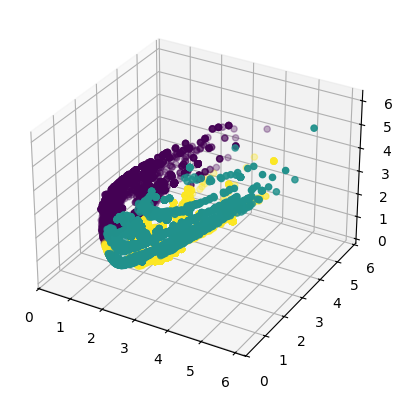

In [235]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_clusters[0],df_clusters[1],df_clusters[2],c=df_clusters['cluster'])


In [236]:
import plotly.express as px

fig = px.scatter_3d(df_clusters, x=0, y=1, z=2, color='cluster')
fig.show()

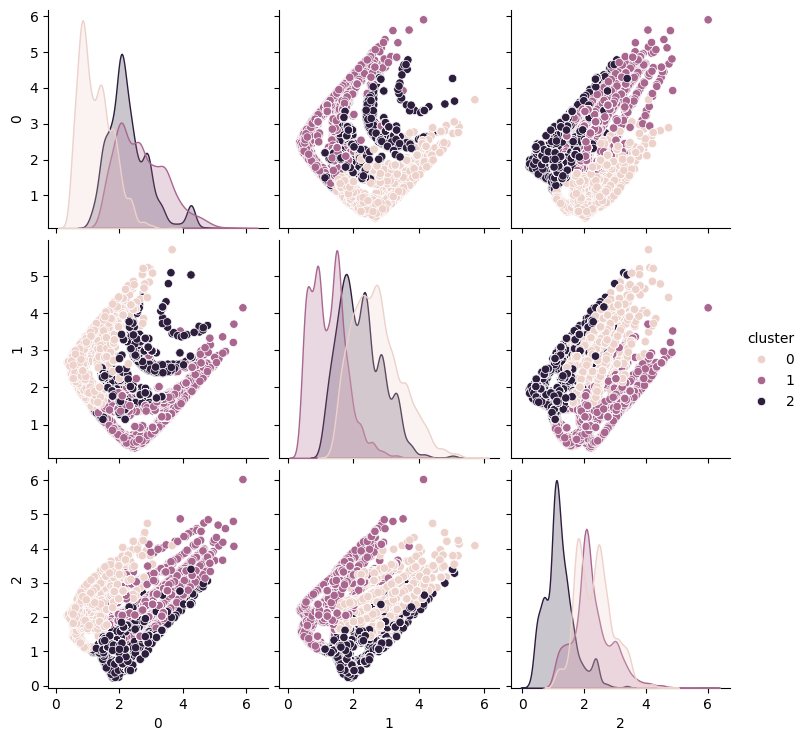

In [237]:
import seaborn as sns

sns.pairplot(df_clusters,hue='cluster')

## Silhouette Score

Agora, iremos utilizar a técnica *silhouette_score* para definir o melhor número K de clusters.

In [238]:
from sklearn.metrics import silhouette_samples, silhouette_score


for x in range(2,10):
    clusterer = KMeans(n_clusters=x, random_state=0)
    cluster_labels = clusterer.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f'X: {x} | Score: {silhouette_avg}')



X: 2 | Score: 0.280282324207625
X: 3 | Score: 0.2724769656355433
X: 4 | Score: 0.28998699518964477
X: 5 | Score: 0.2809302168531889
X: 6 | Score: 0.2797222939325108
X: 7 | Score: 0.28851688605142123
X: 8 | Score: 0.27276684592862516
X: 9 | Score: 0.280750671611772


A partir disso, podemos visualizar que o maior valor foi quando X=4. 

Logo, iremos construir o K-Means com 4 clusters e visualizá-los de diferentes formas:

In [239]:
# K-Means pós Silhouette

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km = KMeans(n_clusters=4,n_init="auto",random_state=0)

df_sil = km.fit_transform(df_pca)
res = km.predict(df_pca)


df_clusters = pd.DataFrame(df_sil)
df_clusters['cluster'] = res

df_clusters

,0,1,2,3,cluster
0,2.926765,2.844662,1.787323,3.448824,2
1,1.322873,1.684834,1.473936,0.899348,3
2,1.252458,2.792538,2.765508,1.118166,3
3,2.108452,0.804810,1.492598,1.568535,1
4,2.705740,0.668282,2.650863,2.194125,1
...,...,...,...,...,...
10975,2.477667,2.146257,0.620912,1.629968,2
10976,1.884483,2.583629,1.790845,0.564951,3
10977,2.340796,3.661660,2.145124,1.791827,3
10978,2.477667,2.146257,0.620912,1.629968,2


In [240]:
# Randscore do Kmeans

from sklearn.metrics.cluster import rand_score

randscore = rand_score(admission,df_clusters['cluster'])
print(randscore)

0.73695395631103


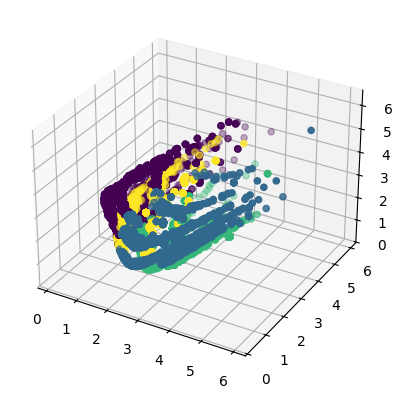

In [241]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_clusters[0],df_clusters[1],df_clusters[2],c=df_clusters['cluster'])


In [242]:
import plotly.express as px

fig = px.scatter_3d(df_clusters, x=0, y=1, z=2, color='cluster')
fig.show()

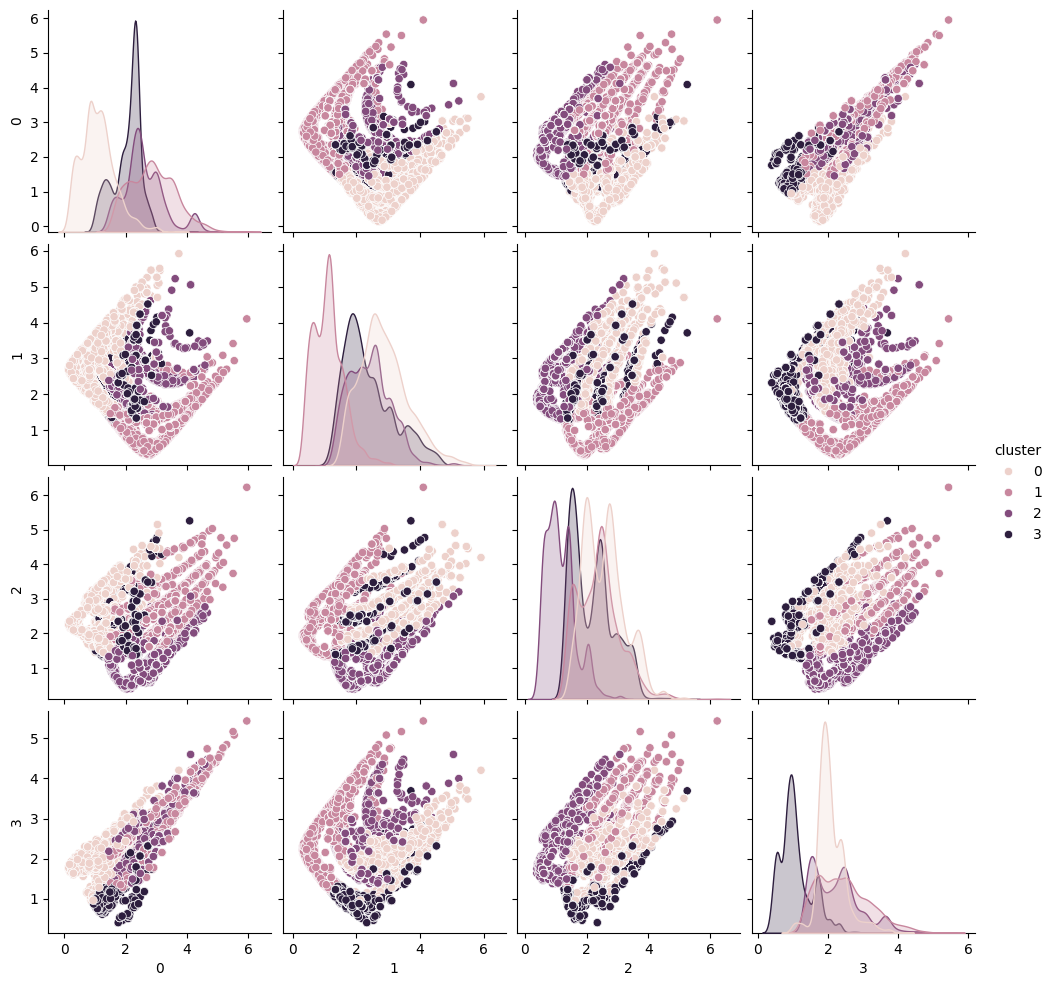

In [243]:
import seaborn as sns

sns.pairplot(df_clusters,hue='cluster')

## Avaliação do KMeans

Ao utilizar todo o dataset, tratado mas sem redução de dimensionalidade, obtivemos valores próximos a 0.65 para RandIndex. Entretanto, estamos lidando com um dataset de alta dimensionalidade, o que não é ideal para tarefas de clusterização devido ao "Curse of Dimensionality", que indica que podem ocorrer variações em ambientes de alta dimensionalidade. 

Para tentar melhorar esse resultado, utilizou-se o PCA para reduzir a dimensionalidade. Ao utilizar o silhouette_score, obtivemos o resultado de que, para um contexto de PCA com 3 features, o número de clusters ideais é 4. Isso nos gerou um RandScore de aproximadamente 0.73. 

Percebemos que ao utilizarmos o silhouette_score, conseguimos otimizar o número de clusters para obtermos um RandScore mais alto. Entretanto, os valores exibidos por ambas métricas expõe o fato de que o dataset não se adequa tão bem a clusterização baseada em KMeans, sendo interessante o teste com diferentes algoritmos, como o DBScan, que utilizam-se de outras técnicas e conseguem ampliar a capacidade de análise.